##  4.10 Coding Etiquette & Excel Reporting

### 1. Import libraries

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

### 2. Import dataframes

In [7]:
# Defining the path
path = r'C:/Users/Marker/Desktop/Instacart Basket Analysis 03-25'

In [8]:
path

'C:/Users/Marker/Desktop/Instacart Basket Analysis 03-25'

In [12]:
# Importing dataframe orders_products_customer_merge.pkl
df_merged = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_merge.pkl'))

In [13]:
# Check columns
df_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,frequency_flag,First Name,Last Name,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Frequent Customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Frequent Customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Frequent Customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308


In [14]:
df_merged.shape

(32404859, 33)

In [15]:
# Removing the limit to the amount of columns displayed by default
pd.set_option('display.max_columns', None)

In [16]:
df_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,Busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,First Name,Last Name,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,both,Mid-range product,Busiest day,Busiest days,Average orders,5,New Customer,7.930208,Low Spender,7.0,Frequent Customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,7.0,10,0,both,Mid-range product,Regularly busy,Slowest days,Most orders,3,New Customer,4.972414,Low Spender,9.0,Frequent Customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,11,1,both,Mid-range product,Least busy,Slowest days,Average orders,3,New Customer,4.972414,Low Spender,9.0,Frequent Customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308


### Step 2
####  Consider any security implications that might exist for this new data.

PII data like names, email addresses and home addresses are sensitive and should be dropped. Customer names were provided and as such will be dropped.

In [24]:
# Dropping the customer names (first_name and surname) columns
df_merged = df_merged.drop(['First Name', 'Last Name'], axis=1)

In [25]:
# Check columns to make sure PII data has been dropped
df_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,Busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,both,Mid-range product,Busiest day,Busiest days,Average orders,5,New Customer,7.930208,Low Spender,7.0,Frequent Customer,Female,Vermont,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,7.0,10,0,both,Mid-range product,Regularly busy,Slowest days,Most orders,3,New Customer,4.972414,Low Spender,9.0,Frequent Customer,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,11,1,both,Mid-range product,Least busy,Slowest days,Average orders,3,New Customer,4.972414,Low Spender,9.0,Frequent Customer,Female,Wisconsin,40,2/9/2020,3,married,31308


### Step 3 
#### Create a regional segmentation of the data.

In [29]:
# Assigning states to their corresponding regions
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [31]:
df_merged.loc[df_merged['State'].isin(Northeast), 'region'] = 'Northeast'

In [32]:
df_merged.loc[df_merged['State'].isin(Midwest), 'region'] = 'Midwest'

In [33]:
df_merged.loc[df_merged['State'].isin(South), 'region'] = 'South'

In [34]:
df_merged.loc[df_merged['State'].isin(West), 'region'] = 'West'

In [35]:
# Check to see if the "region" column was successfully created and populated 
df_merged['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [36]:
# Check dataframe for the region column
df_merged.tail(20)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,Busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income,region
32404839,49688,Fresh Foaming Cleanser,73,11,13.5,1400940,166213,1,1,21,7.0,4,0,both,Mid-range product,Regularly busy,Busiest days,Average orders,3,New Customer,7.473913,Low Spender,7.0,Frequent Customer,Female,Arkansas,52,2/27/2020,2,married,125863,South
32404840,49688,Fresh Foaming Cleanser,73,11,13.5,1219750,171743,5,0,8,30.0,24,0,both,Mid-range product,Busiest day,Busiest days,Average orders,10,New Customer,6.991949,Low Spender,12.0,Regular Customer,Male,New Mexico,18,3/12/2020,2,living with parents and siblings,41546,West
32404841,49688,Fresh Foaming Cleanser,73,11,13.5,307087,172262,4,6,11,30.0,15,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,4,New Customer,8.036585,Low Spender,30.0,Nonfrequent Customer,Female,Michigan,59,2/12/2019,1,married,118691,Midwest
32404842,49688,Fresh Foaming Cleanser,73,11,13.5,2454083,176942,2,6,20,3.0,8,0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,4,New Customer,7.831250,Low Spender,7.0,Frequent Customer,Male,Nevada,39,3/26/2018,0,single,64061,West
32404843,49688,Fresh Foaming Cleanser,73,11,13.5,2710528,178693,26,5,10,3.0,18,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,60,Loyal Customer,8.360085,Low Spender,5.0,Frequent Customer,Male,Rhode Island,53,2/9/2020,2,married,102296,Northeast
32404844,49688,Fresh Foaming Cleanser,73,11,13.5,1173882,178752,7,0,23,21.0,28,0,both,Mid-range product,Busiest day,Busiest days,Fewest orders,16,Regular Customer,8.643223,Low Spender,21.0,Nonfrequent Customer,Female,Washington,81,2/7/2019,2,married,103440,West
32404845,49688,Fresh Foaming Cleanser,73,11,13.5,1525694,178752,15,5,10,30.0,3,1,both,Mid-range product,Regularly busy,Regularly busy,Most orders,16,Regular Customer,8.643223,Low Spender,21.0,Nonfrequent Customer,Female,Washington,81,2/7/2019,2,married,103440,West
32404846,49688,Fresh Foaming Cleanser,73,11,13.5,2439069,182948,4,6,16,13.0,1,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New Customer,7.306667,Low Spender,16.0,Regular Customer,Female,Georgia,58,4/16/2019,1,married,105378,South
32404847,49688,Fresh Foaming Cleanser,73,11,13.5,2392655,182948,8,2,11,16.0,28,1,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New Customer,7.306667,Low Spender,16.0,Regular Customer,Female,Georgia,58,4/16/2019,1,married,105378,South
32404848,49688,Fresh Foaming Cleanser,73,11,13.5,848810,183548,15,2,16,30.0,22,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,15,Regular Customer,8.340659,Low Spender,9.0,Frequent Customer,Female,Wisconsin,77,3/1/2017,3,married,92081,Midwest


##### Determine whether there’s a difference in spending habits between the different U.S. regions.

In [44]:
# Create crosstab between spending and region
crosstab = pd.crosstab(df_merged['spender_flag'], df_merged['region'], dropna = False)

In [45]:
# Check crosstab
crosstab

region,Midwest,Northeast,South,West
spender_flag,,,,
High Spender,155975,108225,209691,160354
Low Spender,7441350,5614511,10582194,8132559


##### The spending habits of all regions are similar in terms of percentages, as a very small percentage of the population in each region are high spenders with low spenders making up the majority. The southern region leads the way in total number of spenders with 10.6 million spenders in total.

In [47]:
# Copy crosstab to clipboard
crosstab.to_clipboard()

### Step 4 
#### Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [52]:
# Create exclusion variables
df_merged.loc[df_merged['max_order'] < 5, 'activity_flag'] = 'low activity'

In [53]:
df_merged.loc[df_merged['max_order'] >= 5, 'activity_flag'] = 'active customer'

In [54]:
# Check variables
df_merged['activity_flag'].value_counts(dropna = False)

activity_flag
active customer    30964564
low activity        1440295
Name: count, dtype: int64

In [55]:
# Create a subset for low activity customers
low_activity_customers = df_merged[df_merged['activity_flag'] =='low activity']

In [59]:
active_customers = df_merged[df_merged['activity_flag'] =='active customer']

In [60]:
# Check whether the low_activity_customers subset numbers match
low_activity_customers.shape

(1440295, 33)

In [62]:
# Check whether the active_customers subset numbers match
active_customers.shape

(30964564, 33)

In [63]:
# Export the low_activity_customers sample as a pickle file. 
low_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_customers.pkl'))

In [64]:
# Export the active_customers sample as a pickle file. 
active_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'active_cutomers.pkl'))

### Step 5 
#### Create a profiling variable based on Age, Income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

As low activity customers ( customers with less than 5 orders) have been excluded from the data, I will be using the newly created dataset for customers with more than 5 orders (active_customers).

#### Creating age groups

In [73]:
active_customers['Age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

Ages range between 18 (min) and 81 (max)
Therefore, age groups were created as follows: 18 - 29, 30 - 49, 50 - 59, 60 - 81

In [76]:
active_customers.loc[(active_customers['Age'] >= 18) & (active_customers['Age'] <= 29), 'age_group'] = '18-29 years old'

C:\Users\Marker\AppData\Local\Temp\ipykernel_13604\2390517382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_customers.loc[(active_customers['Age'] >= 18) & (active_customers['Age'] <= 29), 'age_group'] = '18-29 years old'


In [77]:
active_customers.loc[(active_customers['Age'] >= 30) & (active_customers['Age'] <= 49), 'age_group'] = '30-49 years old'


In [78]:
active_customers.loc[(active_customers['Age'] >= 50) & (active_customers['Age'] <= 59), 'age_group'] = '50-59 years old'


In [79]:
active_customers.loc[(active_customers['Age'] >= 60) & (active_customers['Age'] <= 81), 'age_group'] = '60-81 years old'

In [80]:
# Check
active_customers['age_group'].value_counts(dropna = False)

age_group
60-81 years old    10574504
30-49 years old     9730686
18-29 years old     5817603
50-59 years old     4841771
Name: count, dtype: int64

#### Creating income groups

In [86]:
active_customers['Income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: Income, dtype: float64

From the statistics above, we can split income into 3 (High, Middle, Low) based on the percentile values i.e 25% for low, 50% for middle and 75% for high.

Therefore low income is income <= 67292
          middle income is income > 67292 but < 128102
          high income is income > 128102

In [90]:
active_customers.loc[active_customers['Income'] <= 67292, 'income_group'] = 'Low Income'

C:\Users\Marker\AppData\Local\Temp\ipykernel_13604\3476112115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_customers.loc[active_customers['Income'] <= 67292, 'income_group'] = 'Low Income'


In [91]:
active_customers.loc[(active_customers['Income'] > 67292) & (active_customers['Income'] < 128102), 'income_group'] = 'Middle Income'


In [92]:
active_customers.loc[active_customers['Income'] > 128102, 'income_group'] = 'High Income'

In [93]:
active_customers['income_group'].value_counts(dropna=False)

income_group
Middle Income    15481955
Low Income        7741348
High Income       7741091
NaN                   170
Name: count, dtype: int64

In [98]:
# Check columns
active_customers.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,Busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income,region,activity_flag,age_group,income_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,active customer,60-81 years old,Low Income
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,active customer,60-81 years old,Low Income
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,both,Mid-range product,Busiest day,Busiest days,Average orders,5,New Customer,7.930208,Low Spender,7.0,Frequent Customer,Female,Vermont,66,6/16/2018,2,married,158302,Northeast,active customer,60-81 years old,High Income
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,both,Mid-range product,Regularly busy,Busiest days,Average orders,26,Regular Customer,6.935398,Low Spender,11.0,Regular Customer,Female,Hawaii,51,1/4/2019,2,married,57797,West,active customer,50-59 years old,Low Income
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,9,New Customer,5.957576,Low Spender,19.0,Regular Customer,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,South,active customer,18-29 years old,Low Income


#### Creating labels based on department_id

In [101]:
# Importing departments_wrangled data set
def_dep = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'departments_id.csv'))

In [103]:
# Check columns in data set
def_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [105]:
# Renaming 'Unnamed: 0' to 'department_id'
def_dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [107]:
# Check renamed column
def_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [109]:
df_final = active_customers

In [111]:
#df_final = df_ex.merge(df_dep, on ='department_id', how ='left')

In [113]:
# Merging the final data set with all the changes made with the departments file
df_final = df_final.merge(def_dep, on = 'department_id')

In [114]:
df_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,Busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income,region,activity_flag,age_group,income_group,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,active customer,60-81 years old,Low Income,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,active customer,60-81 years old,Low Income,snacks
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,both,Mid-range product,Busiest day,Busiest days,Average orders,5,New Customer,7.930208,Low Spender,7.0,Frequent Customer,Female,Vermont,66,6/16/2018,2,married,158302,Northeast,active customer,60-81 years old,High Income,snacks
3,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,both,Mid-range product,Regularly busy,Busiest days,Average orders,26,Regular Customer,6.935398,Low Spender,11.0,Regular Customer,Female,Hawaii,51,1/4/2019,2,married,57797,West,active customer,50-59 years old,Low Income,snacks
4,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,9,New Customer,5.957576,Low Spender,19.0,Regular Customer,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,South,active customer,18-29 years old,Low Income,snacks


#### Creating a dependents group

In [118]:
df_final.loc[df_final['Number of Dependents'] == 0, 'dependants_group'] = 'No Dependents'

In [119]:
df_final.loc[df_final['Number of Dependents'] > 0, 'dependants_group'] = 'Has Dependents'

In [120]:
# Check number of dependents in the dataframe
df_final['Number of Dependents'].value_counts()

Number of Dependents
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

In [122]:
# Check the number of dependents in dependants_group to see if they match with the total number of dependents in the dataframe
df_final['dependants_group'].value_counts()

dependants_group
Has Dependents    23224883
No Dependents      7739681
Name: count, dtype: int64

In [125]:
df_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,Busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income,region,activity_flag,age_group,income_group,department,dependants_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,active customer,60-81 years old,Low Income,snacks,Has Dependents
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,active customer,60-81 years old,Low Income,snacks,Has Dependents
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,both,Mid-range product,Busiest day,Busiest days,Average orders,5,New Customer,7.930208,Low Spender,7.0,Frequent Customer,Female,Vermont,66,6/16/2018,2,married,158302,Northeast,active customer,60-81 years old,High Income,snacks,Has Dependents
3,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,both,Mid-range product,Regularly busy,Busiest days,Average orders,26,Regular Customer,6.935398,Low Spender,11.0,Regular Customer,Female,Hawaii,51,1/4/2019,2,married,57797,West,active customer,50-59 years old,Low Income,snacks,Has Dependents
4,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,9,New Customer,5.957576,Low Spender,19.0,Regular Customer,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,South,active customer,18-29 years old,Low Income,snacks,Has Dependents


In [128]:
df_final.tail()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,Busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income,region,activity_flag,age_group,income_group,department,dependants_group
30964559,49688,Fresh Foaming Cleanser,73,11,13.5,3106363,197371,10,4,14,30.0,17,0,both,Mid-range product,Least busy,Slowest days,Most orders,10,New Customer,8.814508,Low Spender,7.0,Frequent Customer,Female,Alabama,62,10/25/2019,1,married,128072,South,active customer,60-81 years old,Middle Income,personal care,Has Dependents
30964560,49688,Fresh Foaming Cleanser,73,11,13.5,1788356,200215,2,0,9,5.0,27,0,both,Mid-range product,Busiest day,Busiest days,Most orders,6,New Customer,8.220313,Low Spender,7.0,Frequent Customer,Female,Rhode Island,47,9/13/2017,1,married,166687,Northeast,active customer,30-49 years old,High Income,personal care,Has Dependents
30964561,49688,Fresh Foaming Cleanser,73,11,13.5,809510,200873,5,3,8,15.0,12,0,both,Mid-range product,Regularly busy,Slowest days,Average orders,20,Regular Customer,8.500344,Low Spender,6.0,Frequent Customer,Female,Michigan,57,3/21/2018,1,married,100649,Midwest,active customer,50-59 years old,Middle Income,personal care,Has Dependents
30964562,49688,Fresh Foaming Cleanser,73,11,13.5,2359893,200873,9,3,15,5.0,11,1,both,Mid-range product,Regularly busy,Slowest days,Most orders,20,Regular Customer,8.500344,Low Spender,6.0,Frequent Customer,Female,Michigan,57,3/21/2018,1,married,100649,Midwest,active customer,50-59 years old,Middle Income,personal care,Has Dependents
30964563,49688,Fresh Foaming Cleanser,73,11,13.5,2385091,205926,11,1,15,6.0,35,0,both,Mid-range product,Regularly busy,Busiest days,Most orders,11,Regular Customer,8.133333,Low Spender,6.0,Frequent Customer,Female,Pennsylvania,34,2/25/2017,2,married,56331,Northeast,active customer,30-49 years old,Low Income,personal care,Has Dependents


#### Group by family profile

In [131]:
df_final['Family Status'].value_counts(dropna = False)

Family Status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

In [132]:
df_final['Gender'].value_counts(dropna = False)

Gender
Male      15586740
Female    15377824
Name: count, dtype: int64

##### Married with no children

In [135]:
df_final.loc[(df_final['Family Status'] == 'married') & (df_final['dependants_group'] == 'No Dependents') & (df_final['Gender'] == 'Female'), 'family_profile'] = 'Married Woman, no children'

In [137]:
df_final.loc[(df_final['Family Status'] == 'married') & (df_final['dependants_group'] == 'No Dependents') & (df_final['Gender'] == 'Male'), 'family_profile'] = 'Married Man, no children'

#### Married with children

In [139]:
df_final.loc[(df_final['Family Status'] == 'married') & (df_final['dependants_group'] == 'Has Dependents') & (df_final['Gender'] == 'Female'), 'family_profile'] = 'Married Woman with Children'

In [140]:
df_final.loc[(df_final['Family Status'] == 'married') & (df_final['dependants_group'] == 'Has Dependents') & (df_final['Gender'] == 'Male'), 'family_profile'] = 'Married Man with Children'

#### Single with no children

In [142]:
df_final.loc[(df_final['Family Status'].isin(['single','living with parents and siblings','divorced/widowed'])) & (df_final['dependants_group'] == 'No Dependents') & (df_final['Gender'] == 'Female'), 'family_profile'] = 'Single Woman, no Children'

In [143]:
df_final.loc[(df_final['Family Status'].isin(['single','living with parents and siblings','divorced/widowed'])) & (df_final['dependants_group'] == 'No Dependents') & (df_final['Gender'] == 'Male'), 'family_profile'] = 'Single Man, no Children'

#### Single with children

In [146]:
df_final.loc[(df_final['Family Status'].isin(['single','living with parents and siblings','divorced/widowed'])) & (df_final['dependants_group'] == 'Has Dependents') & (df_final['Gender'] == 'Female'), 'family_profile'] = 'Single Woman with Children'

In [147]:
df_final.loc[(df_final['Family Status'].isin(['single','living with parents and siblings','divorced/widowed'])) & (df_final['dependants_group'] == 'Has Dependents') & (df_final['Gender'] == 'Male'), 'family_profile'] = 'Single Man with Children'

In [148]:
df_final['family_profile'].value_counts(dropna = False)

family_profile
Married Man with Children      10947746
Married Woman with Children    10795965
Single Man, no Children         3881398
Single Woman, no Children       3858283
Single Man with Children         757596
Single Woman with Children       723576
Name: count, dtype: int64

There are no married males or females without children.

In [158]:
# Check columns
df_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,Busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income,region,activity_flag,age_group,income_group,department,dependants_group,family_profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,active customer,60-81 years old,Low Income,snacks,Has Dependents,Married Man with Children
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,active customer,60-81 years old,Low Income,snacks,Has Dependents,Married Man with Children
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,both,Mid-range product,Busiest day,Busiest days,Average orders,5,New Customer,7.930208,Low Spender,7.0,Frequent Customer,Female,Vermont,66,6/16/2018,2,married,158302,Northeast,active customer,60-81 years old,High Income,snacks,Has Dependents,Married Woman with Children
3,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,both,Mid-range product,Regularly busy,Busiest days,Average orders,26,Regular Customer,6.935398,Low Spender,11.0,Regular Customer,Female,Hawaii,51,1/4/2019,2,married,57797,West,active customer,50-59 years old,Low Income,snacks,Has Dependents,Married Woman with Children
4,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,9,New Customer,5.957576,Low Spender,19.0,Regular Customer,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,South,active customer,18-29 years old,Low Income,snacks,Has Dependents,Single Man with Children


### Step 6
#### Create an appropriate visualization to show the distribution of profiles.

##### Family profiles distribution

In [162]:
# Check dataframe columns
df_final.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'price_range_loc', 'Busiest_day', 'Busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_spend',
       'spender_flag', 'Customer_frequency', 'frequency_flag', 'Gender',
       'State', 'Age', 'Date Joined', 'Number of Dependents', 'Family Status',
       'Income', 'region', 'activity_flag', 'age_group', 'income_group',
       'department', 'dependants_group', 'family_profile'],
      dtype='object')

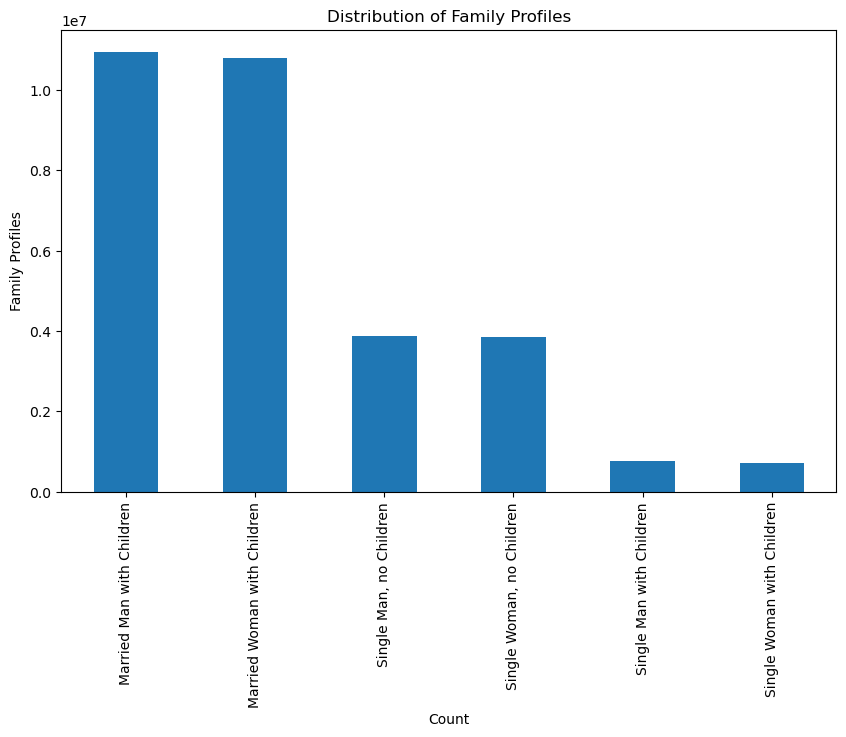

In [164]:
# Create family_profile_bar chart
family_profile_bar_chart = df_final['family_profile'].value_counts().plot.bar(figsize = (10, 6))
#family_profile_bar_chart = df_final['family_profile'].value_counts().sort_values(ascending = True).plot.barh
#plt.figure(figsize=(6, 10))
# Titles and labels
plt.title('Distribution of Family Profiles')
plt.xlabel('Count')
plt.ylabel('Family Profiles')

plt.show()

In [166]:
plt.figure(figsize=(13, 13))  # Set figure size
df_final['family_profile'].value_counts().plot.pie(
    autopct='%1.1f%%',  # Show percentage on the chart
    startangle=90,  # Rotate to start from the top
    cmap='Set3',  # Color map for variety
    wedgeprops={'edgecolor': 'black'}  # Add black edges for clarity
)

# Titles
plt.title('Distribution of Family Profiles')

# Show the chart
plt.ylabel('')  # Remove y-label for better display


Text(0, 0.5, '')

In [168]:
# Export bar chart to visualizations folder
family_profile_bar_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_profile_bar_chart.jpg'))

In [170]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_profile_pie_chart.jpg'))

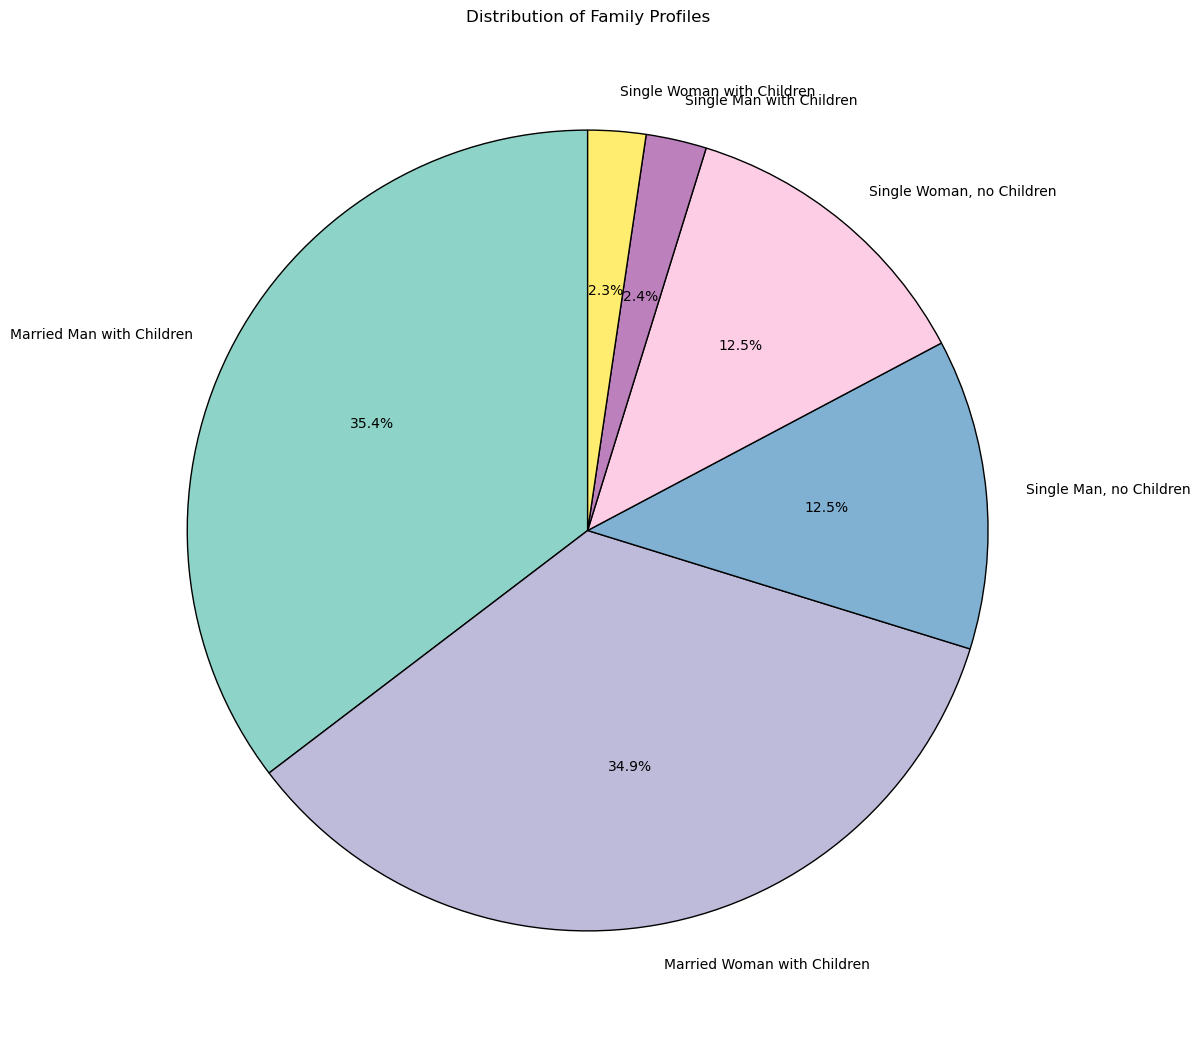

In [172]:
plt.show()

### Step 7 
#### Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [175]:
# Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
family_profile_agg = df_final.groupby('family_profile').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [176]:
family_profile_agg

order_id prices                    
                                count    min       mean      max
family_profile                                                  
Married Man with Children    10947746    1.0  12.013314  99999.0
Married Woman with Children  10795965    1.0  11.874497  99999.0
Single Man with Children       757596    1.0   9.625240  99999.0
Single Man, no Children       3881398    1.0  12.537981  99999.0
Single Woman with Children     723576    1.0  12.214567  99999.0
Single Woman, no Children     3858283    1.0  11.664725  99999.0

### Step 8
#### Compare your customer profiles with regions and departments.

#### Distribution of family profile by Region

In [181]:
# Create crosstab of family_profile and region
fam_region_profile = pd.crosstab(df_final['family_profile'],df_final['region'], dropna = False)

In [182]:
# Check
fam_region_profile

region,Midwest,Northeast,South,West
family_profile,,,,
Married Man with Children,2527235,1996450,3655100,2768961
Married Woman with Children,2560027,1857323,3568649,2809966
Single Man with Children,179522,137743,251334,188997
"Single Man, no Children",917274,690826,1267677,1005621
Single Woman with Children,171913,118687,254123,178853
"Single Woman, no Children",905542,663656,1314256,974829


In [191]:
# Create fam_region_profile_stacked_bar chart
fam_region_profile_stacked_bar_chart = fam_region_profile.plot.barh(stacked = True, figsize = (10, 6))

# Titles and labels
plt.title('Family Profile Distribution by Region')
plt.xlabel('Family Profiles')
plt.ylabel('Count')
plt.legend(title = 'Region', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()

In [193]:
# Export stacked bar chart to visualizations folder
fam_region_profile_stacked_bar_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_region_profile_stacked_bar_chart.png'))

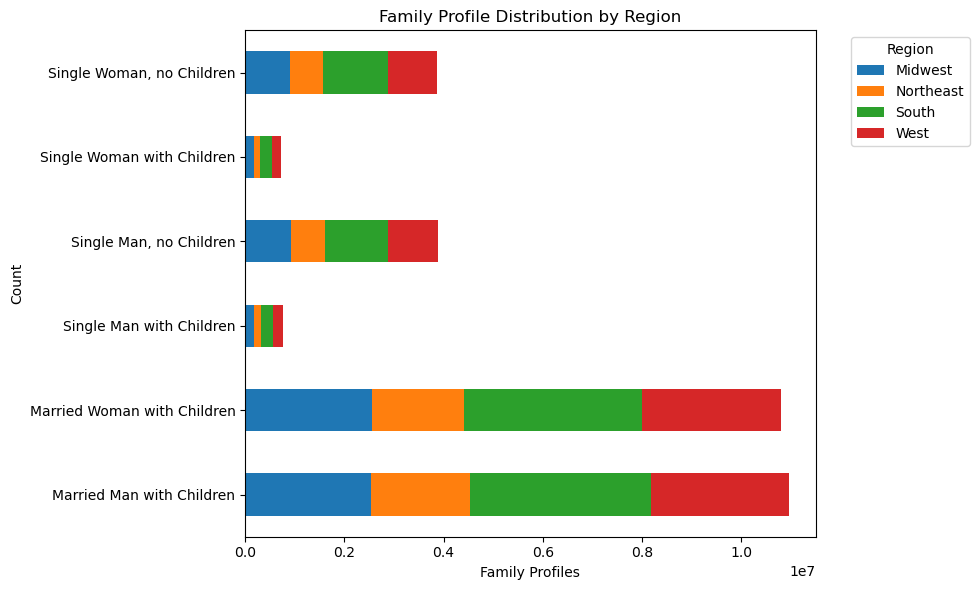

In [195]:
plt.show()

#### Distribution of family profiles by department

In [198]:
# Create crosstab of department and family_profile
fam_departments_profile = pd.crosstab(df_final['department'],df_final['family_profile'], dropna = False)

In [199]:
# Check
fam_departments_profile

family_profile,Married Man with Children,Married Woman with Children,Single Man with Children,"Single Man, no Children",Single Woman with Children,"Single Woman, no Children"
department,,,,,,
alcohol,46962,52459,4595,18226,3784,18601
babies,146764,140919,10128,52859,9253,50469
bakery,392293,393456,27333,142059,26351,139336
beverages,907782,899671,60815,322920,58292,322421
breakfast,235905,235315,16851,83621,16347,82811
bulk,11934,11884,856,3919,777,4081
canned goods,361208,351369,25510,126855,22967,124165
dairy eggs,1828819,1803780,127224,646478,122983,647898
deli,353049,349284,24343,127199,23776,126183


In [202]:
# Create fam_departments_profile_bar chart
fam_departments_profile_bar = fam_departments_profile.sort_values(by='Married Woman with Children', ascending=True)

plt.figure(figsize=(10, 12))  
fam_departments_profile_bar.plot.barh(stacked=True)

# Titles and labels
plt.title('Family Profile Distribution by Department')
plt.xlabel('Count')
plt.ylabel('Departments')
plt.legend(title='Family Profile', bbox_to_anchor=(1.05, 1), loc='upper left')



In [204]:
# Export stacked bar chart to visualizations folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_departments_profile_bar.png'))

<Figure size 1000x1200 with 0 Axes>

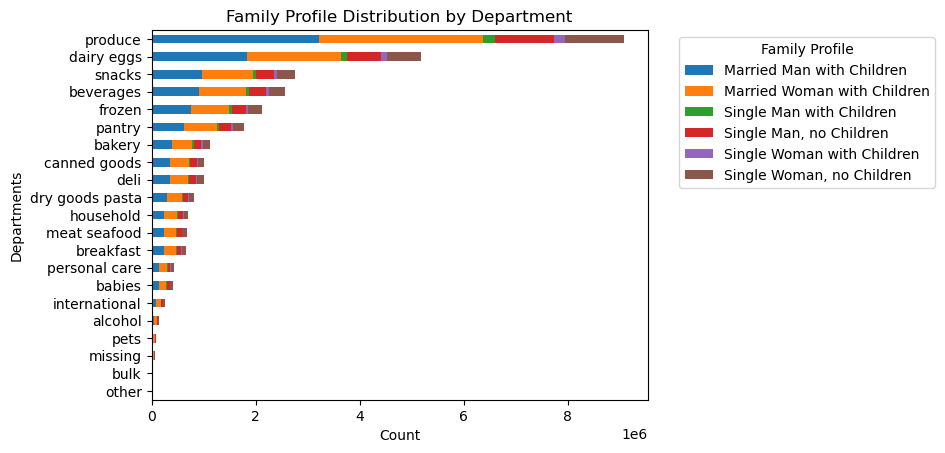

In [206]:
plt.show()

#### Income distribution statistics

In [209]:
# Aggregate income_group and order_id columns
income_group_distribution_agg = df_final.groupby('income_group').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [210]:
# Check
income_group_distribution_agg

order_id prices                    
                  count    min       mean      max
income_group                                      
High Income     7741091    1.0  21.980851  99999.0
Low Income      7741348    1.0   7.310082  14900.0
Middle Income  15481955    1.0   9.221659  99999.0

In [219]:
# Create income_group_distribution chart
income_group_distribution = df_final['income_group'].value_counts().plot.barh()

# Titles and labels
plt.title('Income Group Distribution')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.tight_layout()

In [220]:
# Export the bar chart to visualizations folder
income_group_distribution.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_distribution.png'))

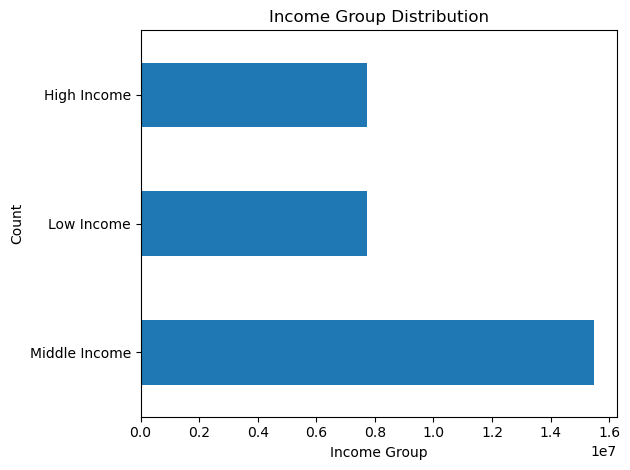

In [223]:
plt.show()

#### Distribution of income group by region

In [581]:
print("Checking for NaN values...\n")
print(income_group_region.isna().sum())  # Shows count of NaNs per column
print("\nTotal NaNs in DataFrame:", income_group_region.isna().sum().sum())  # Total NaNs

Checking for NaN values...

region
Midwest      0
Northeast    0
South        0
West         0
dtype: int64

Total NaNs in DataFrame: 0


In [583]:
# Create crosstab of income_group and region
income_group_region = pd.crosstab(df_final['income_group'],df_final['region'], dropna = False)

In [584]:
# Check
income_group_region

region,Midwest,Northeast,South,West
income_group,,,,
High Income,1841838,1372838,2549267,1977148
Low Income,1790670,1367074,2593563,1990041
Middle Income,3628943,2724773,5168309,3959930
NaN,62,0,0,108


In [601]:



# Ensure no NaNs are left
income_group_region_cleaned = income_group_region_cleaned.dropna()

# Create bar chart with cleaned data
income_group_region_bar = income_group_region_cleaned.plot(
    kind='bar',
    colormap='plasma',
    edgecolor='black',
    figsize=(10, 6)  # Adjust figure size
)
# Titles and labels
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Income Group Distribution by Region')
plt.xlabel('Income Group')
plt.ylabel('Count')

# Adjust layout to prevent cropping
plt.tight_layout()


In [238]:
# Export income_group_region_bar chart
income_group_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_region_bar.png'))

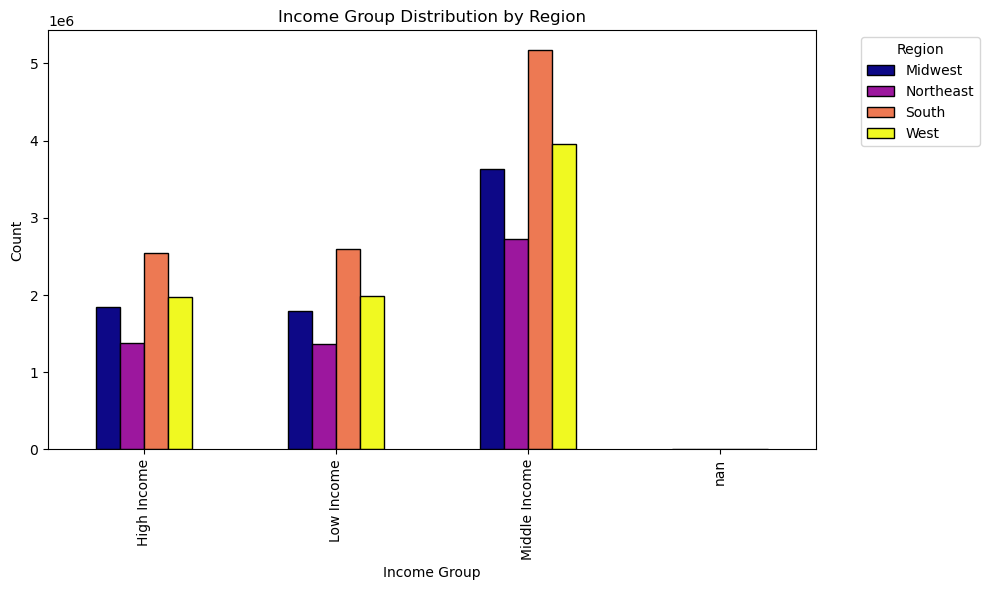

In [603]:
plt.show()

#### Distribution of income group by departments

In [243]:
# Create crosstab of department and income_group columns
income_group_department = pd.crosstab(df_final['department'],df_final['income_group'], dropna = False) 

In [244]:
# Check
income_group_department

income_group,High Income,Low Income,Middle Income,NaN
department,,,,
alcohol,40862,36825,66940,0
babies,105674,83835,220883,0
bakery,290423,264827,565577,1
beverages,618517,743205,1210163,16
breakfast,162877,187562,320400,11
bulk,7541,9400,16510,0
canned goods,265861,222477,523733,3
dairy eggs,1314008,1229252,2633894,28
deli,251016,248154,504662,2


In [508]:
# Create income_group_department_bar chart
income_group_department_bar = income_group_department.plot(kind = 'bar', stacked = True, colormap = 'plasma', edgecolor = 'black', figsize=(10, 6))

# Titles and labels
plt.title('Income Group Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.tight_layout()
 


In [261]:
# Export income_group_department_bar to visualizations folder
income_group_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_department_bar.png'))

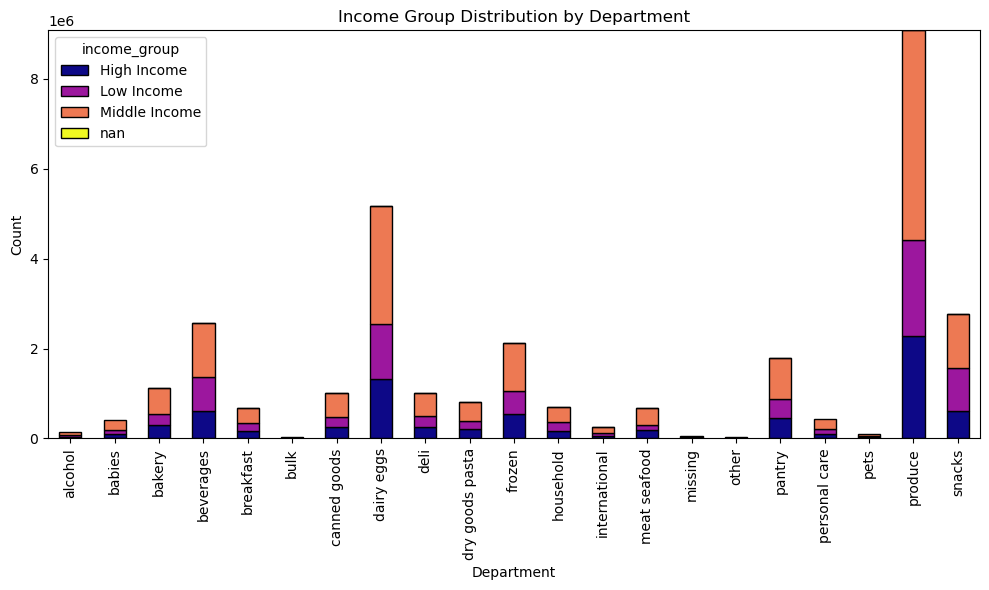

In [510]:
plt.show()


### Age groups distribution

In [266]:
# Aggregate age_group and order_id columns
age_group_agg = df_final.groupby('age_group').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [267]:
# Check
age_group_agg

order_id prices                    
                    count    min       mean      max
age_group                                           
18-29 years old   5817603    1.0  12.198693  99999.0
30-49 years old   9730686    1.0  12.078357  99999.0
50-59 years old   4841771    1.0  11.780440  99999.0
60-81 years old  10574504    1.0  11.724449  99999.0

In [268]:
plt.figure(figsize=(8,8))  # Set figure size
df_final['age_group'].value_counts().plot.pie(
    autopct='%1.1f%%',  # Show percentage on the chart
    startangle=90,  # Rotate to start from the top
    cmap='viridis',  # Color map for variety
    wedgeprops={'edgecolor': 'black'}  # Add black edges for clarity
)

# Titles
plt.title('Distribution of Age Groups')

# Show the chart
plt.ylabel('')  # Remove y-label for better display

Text(0, 0.5, '')

In [272]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_groups_pie_chart.jpg'))

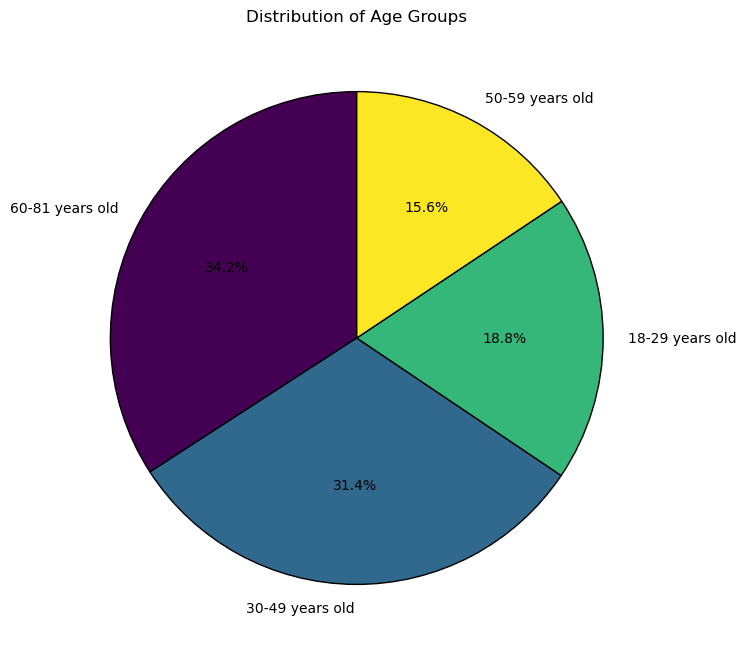

In [274]:
plt.show()

#### Distribution of age groups by region

In [277]:
# Create a crosstab of region and age_group
age_group_region = pd.crosstab(df_final['region'], df_final['age_group'], dropna = False)

In [278]:
# Check
age_group_region

age_group,18-29 years old,30-49 years old,50-59 years old,60-81 years old
region,,,,
Midwest,1355838,2301964,1148268,2455443
Northeast,1023984,1707319,849153,1884229
South,1960651,3248720,1580347,3521421
West,1477130,2472683,1264003,2713411


In [309]:
# Create age_group_region_bar chart
age_group_region_bar = age_group_region.plot(kind ='bar', stacked = True, figsize = (10, 6))

# Titles and labels
plt.title('Age Group Distribution by Region')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()

In [313]:
# Export age_group_region_bar chart to visualizations folder
age_group_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_region_bar.png'))

In [315]:
plt.show()

#### Distribution of age groups by departments

In [318]:
# Create a crosstab of department and age_group
age_group_department = pd.crosstab(df_final['department'], df_final['age_group'], dropna = False)

In [319]:
# Check
age_group_department

age_group,18-29 years old,30-49 years old,50-59 years old,60-81 years old
department,,,,
alcohol,27938,46155,22938,47596
babies,77758,130770,63126,138738
bakery,210358,352255,175769,382446
beverages,477655,803187,407390,883669
breakfast,128115,210133,104851,227751
bulk,6414,10594,5019,11424
canned goods,192170,316357,159100,344447
dairy eggs,976278,1636961,801431,1762512
deli,188533,315711,156255,343335


In [320]:
# Create age_group_department_bar chart
age_group_department_bar = age_group_department.plot(kind ='bar', figsize =(10, 6), width = 0.8)

# Titles and labels
plt.title('Age Group Distribution by Department')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()

In [321]:
# Export age_group_department_bar chart to visualizations folder
age_group_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_department_bar.png'))

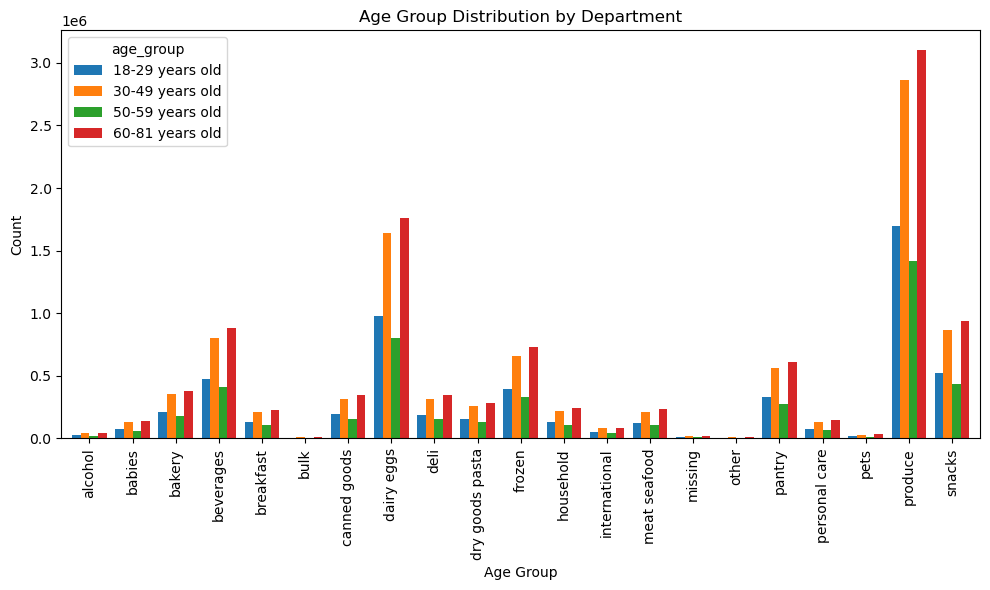

In [322]:
plt.show()

#### Most Requested Departments

In [329]:
# Aggregate department and order_id columns
department_stats = df_final.groupby('department').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [330]:
# Check
department_stats

order_id prices                    
                   count    min       mean      max
department                                         
alcohol           144627    1.0   8.150699     15.0
babies            410392    1.0   7.634399     15.0
bakery           1120828    1.0   7.857482     15.0
beverages        2571901    1.0   7.682556     15.0
breakfast         670850    1.0   8.031647     14.9
bulk               33451    1.4   8.346919     14.1
canned goods     1012074    1.0   7.546660     15.0
dairy eggs       5177182    1.0  33.114599  99999.0
deli             1003834    1.0   7.783347     15.0
dry goods pasta   822136    1.0   7.349370     15.0
frozen           2121731    1.0   7.733725     15.0
household         699857    1.0   7.379951     15.0
international     255991    1.0   7.678797     15.0
meat seafood      674781    8.0  16.300034     25.0
missing            64768    1.0   8.660655     15.0
other              34411    1.1   6.961995     15.0
pantry           1782705    1.0   8.014482     20.0
personal care     424306    1.0   7.998744     15.0
pets               93060    1.0   7.887489     15.0
produce          9079273    1.0   7.980348     15.0
snacks           2766406    1.6   4.275555      7.0

In [331]:
# Create department_counts 
department_counts = df_final['department'].value_counts()

# Create departments_distribution_bar chart
departments_distribution_bar = plt.figure(figsize = (15, 8))
sns.barplot(x = department_counts.index, y = department_counts.values, palette = 'autumn')

# Titles and labels
plt.title('Departments with the most orders')
plt.xlabel('Departments')
plt.ylabel('Count')
plt.xticks(rotation = 45, ha = 'right')

C:\Users\Marker\AppData\Local\Temp\ipykernel_13604\3405386361.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = department_counts.index, y = department_counts.values, palette = 'autumn')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'produce'),
  Text(1, 0, 'dairy eggs'),
  Text(2, 0, 'snacks'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'frozen'),
  Text(5, 0, 'pantry'),
  Text(6, 0, 'bakery'),
  Text(7, 0, 'canned goods'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'household'),
  Text(11, 0, 'meat seafood'),
  Text(12, 0, 'breakfast'),
  Text(13, 0, 'personal care'),
  Text(14, 0, 'babies'),
  Text(15, 0, 'international'),
  Text(16, 0, 'alcohol'),
  Text(17, 0, 'pets'),
  Text(18, 0, 'missing'),
  Text(19, 0, 'other'),
  Text(20, 0, 'bulk')])

In [142]:
# Export departments_distribution_bar chart
departments_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments_distribution_bar.png'))

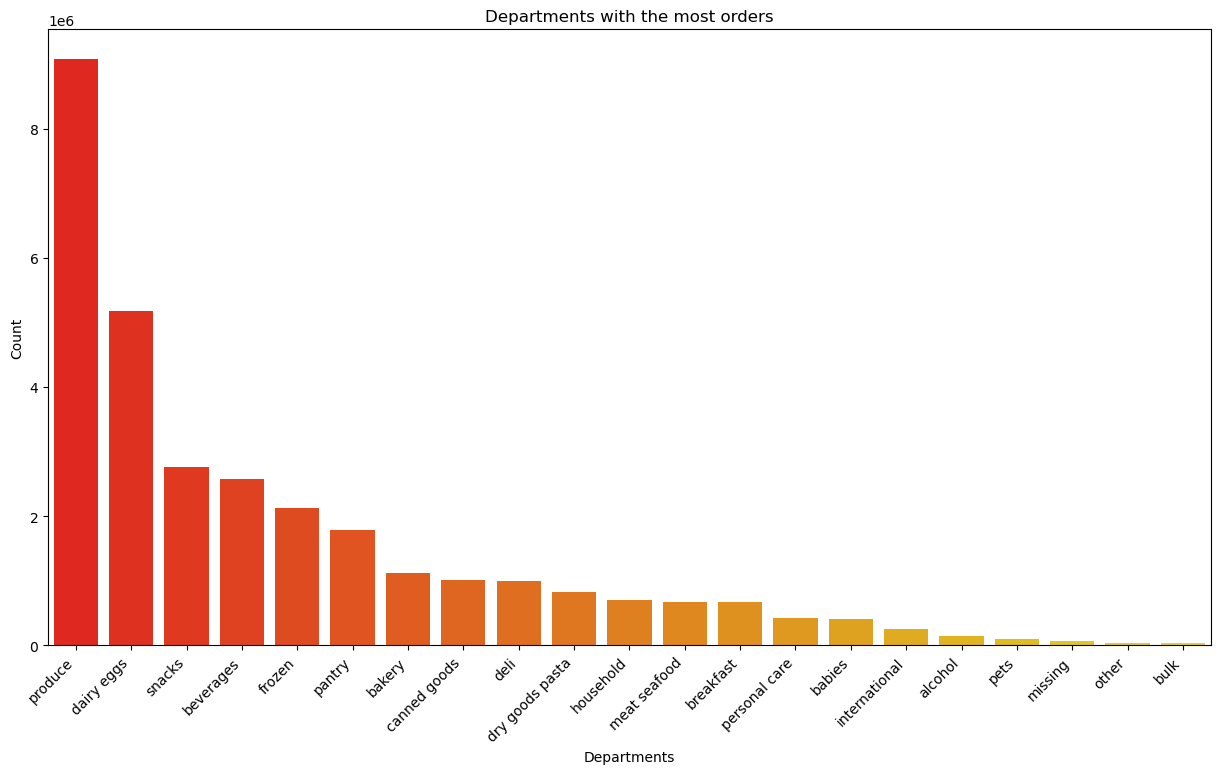

In [337]:
plt.show()

#### Distribution of departments by region

In [340]:
# Create crosstab of department and region
depatments_region = pd.crosstab(df_final['department'],df_final['region'], dropna = False)

In [341]:
# Check
depatments_region

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


In [342]:
# Define departments_region_bar
departments_region_bar = depatments_region.sort_values(by = 'Midwest', ascending = True).plot(kind ='barh', stacked = True, figsize = (15, 10))

# Titles and labels
plt.title('Department Distribution by Region')
plt.xlabel('Count')
plt.ylabel('Department')
plt.legend(title = 'Region')
plt.tight_layout() 

In [703]:
# Export departments_region_bar chart
departments_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments_region_bar.png'))

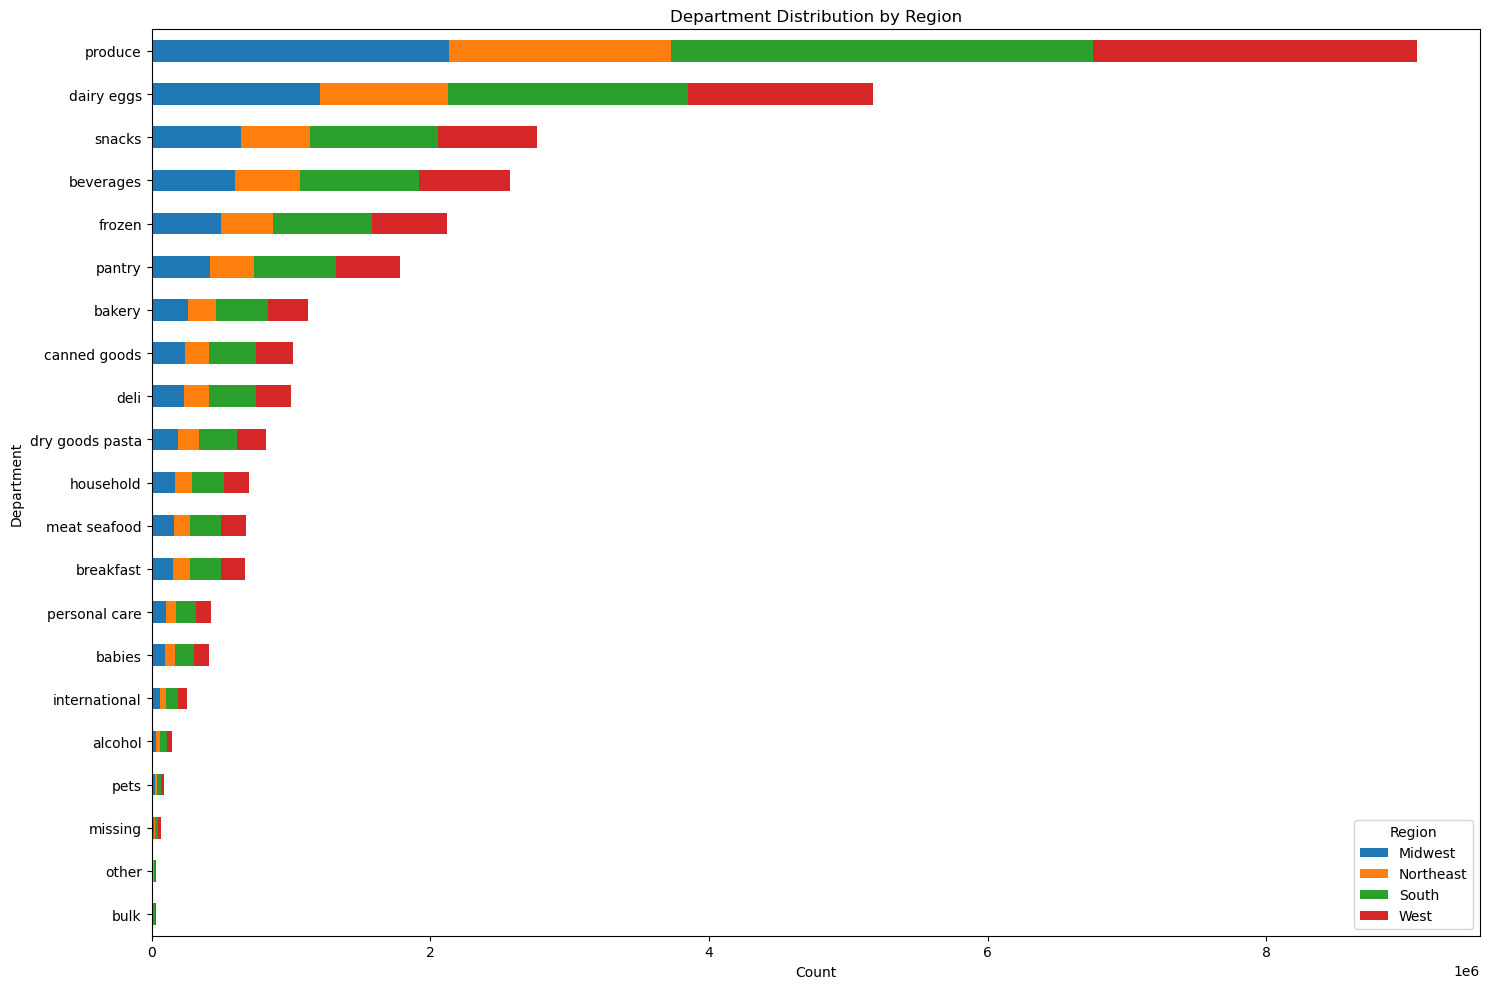

In [346]:
plt.show()

#### What are the busiest days of the week?

In [349]:
# Check dataframe columns
df_final.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'price_range_loc', 'Busiest_day', 'Busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_spend',
       'spender_flag', 'Customer_frequency', 'frequency_flag', 'Gender',
       'State', 'Age', 'Date Joined', 'Number of Dependents', 'Family Status',
       'Income', 'region', 'activity_flag', 'age_group', 'income_group',
       'department', 'dependants_group', 'family_profile'],
      dtype='object')

In [351]:
df_final['order_dow'].value_counts(dropna = False)

order_dow
0    5908610
1    5411686
6    4291304
5    4033729
2    4024706
3    3669535
4    3624994
Name: count, dtype: int64

From the output above, 0 = Saturday, 1 = Sunday, 2 = Monday, 3 = Tuesday, 4 = Wednesday, 5 = Thursday, 6 = Friday.
I created a new column called 'week_days_orders'

In [354]:
# Create week_days_orders column
df_final['week_days_orders'] = df_final['order_dow'].map({0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'})

In [355]:
# Check
df_final['week_days_orders'].value_counts(dropna = False)

week_days_orders
Saturday     5908610
Sunday       5411686
Friday       4291304
Thursday     4033729
Monday       4024706
Tuesday      3669535
Wednesday    3624994
Name: count, dtype: int64

In [358]:
# Define busiest_week_days_bar 
busiest_week_days = df_final['week_days_orders'].value_counts(dropna = False)

In [360]:
# Define busiest_week_days_bar 
busiest_week_days_bar = df_final['week_days_orders'].value_counts()

# Define days_of_week_order
days_of_week_order = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
fig = busiest_week_days_bar = busiest_week_days_bar.reindex(days_of_week_order)


# Titles and labels
plt.figure(figsize = (10, 6))
plt.bar(busiest_week_days_bar.index, busiest_week_days_bar.values)
plt.title('Busiest Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')

Text(0, 0.5, 'Number of Orders')

In [362]:
# Export bar chart
#plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_dow_bar.png'))

In [364]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_week_days_bar.png'))

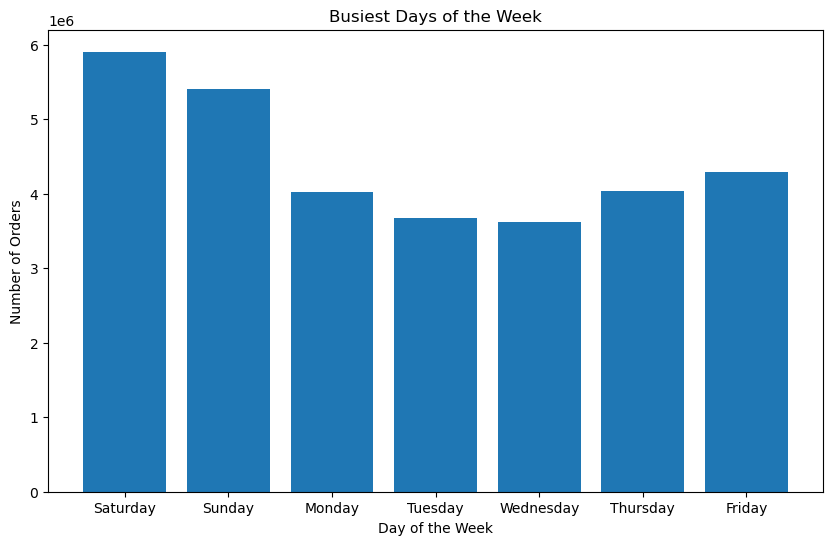

In [366]:
plt.show()

#### What are the Busiest hours of the day?

In [369]:
# Create histogram for order_hour_of_day
hist_order_hour_of_day = df_final['order_hour_of_day'].plot.hist(bins = 24, title = 'Orders By Hour')

In [370]:
# Export order_hour_of_day histogram
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour_of_day_png'))

#### Which hours during the day do customers spend more money?

In [372]:
# Create crosstab for order_hour_of_day and price_range
prices_by_hour = pd.crosstab(df_final['order_hour_of_day'],df_final['price_range_loc'], dropna = False)

In [373]:
# Check
prices_by_hour

price_range_loc,High-range product,Low-range product,Mid-range product
order_hour_of_day,,,
0,2644,64819,140579
1,1335,34033,74253
2,885,20622,44184
3,611,15029,33156
4,664,15711,34388
5,1018,26074,57326
6,3622,86902,190489
7,11274,267170,584769
8,21155,518313,1119642


In [376]:
# Define hourly_spending line chart
hourly_spending = df_final.groupby('order_hour_of_day')['prices'].sum()

fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(hourly_spending.index, hourly_spending.values, marker='o')

# Titles and labels
ax.set_title('Hourly Spending Pattern')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Total Spending')
ax.grid(True)

In [377]:
# Export hourly_spending_line chart
fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hourly_spending_line.png'))

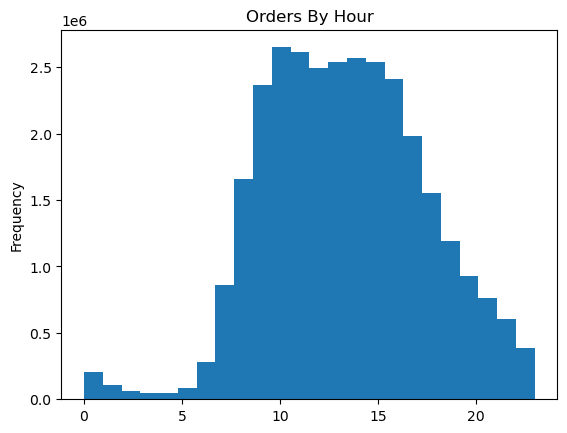

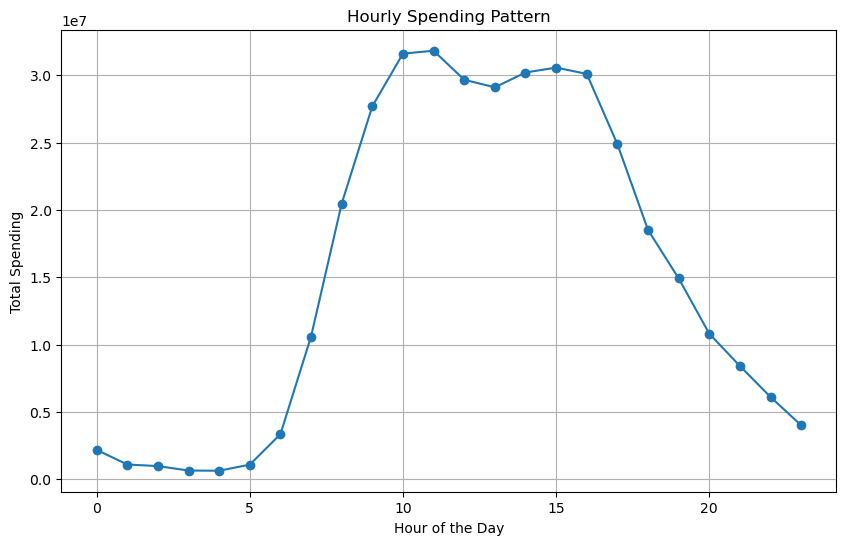

In [378]:
plt.show()

#### Price Range Groupings

In [385]:
# Define price_range_bar
price_range_bar = df_final['price_range_loc'].value_counts()

# Define colors
price_range_bar = price_range_bar.plot(kind ='bar', color = ['#ffA500','#5cb85c', '#d9534f'])
                                       
# Titles and labels
plt.xlabel('', fontsize =12)
plt.xticks(rotation = 0)
plt.ylabel('Order Count', fontsize = 12)  
plt.title('Price Range Distribution', fontsize = 14)


Text(0.5, 1.0, 'Price Range Distribution')

In [167]:
# Export order_price_range bar chart
price_range_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_price_range.png'))

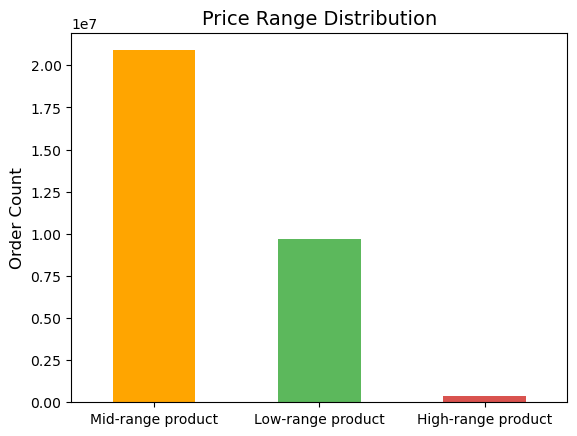

In [387]:
plt.show()

#### Distribution of income by price range

In [390]:
# Create a crosstab for price_range and income_group
price_range_income = pd.crosstab(df_final['price_range_loc'],df_final['income_group'], dropna = False)

In [392]:
# Check
price_range_income

income_group,High Income,Low Income,Middle Income,NaN
price_range_loc,,,,
High-range product,111832,71574,214543,4
Low-range product,2304361,2771538,4598900,41
Mid-range product,5324898,4898236,10668512,125


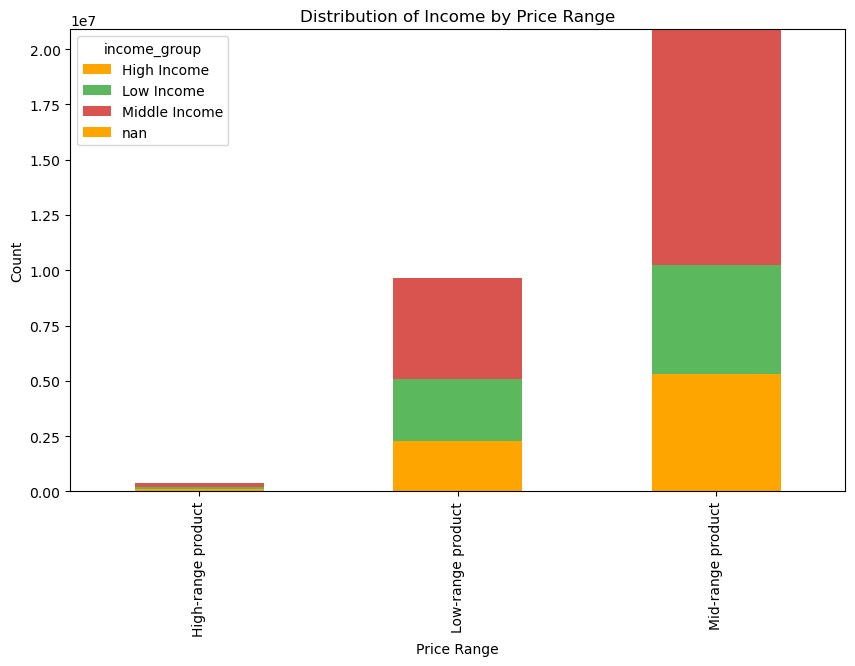

In [394]:
# Create price_range_income bar chart 
price_range_income.plot(kind = 'bar', stacked = True, figsize=(10, 6), color = ['#ffA500','#5cb85c', '#d9534f'])

# # Title and labels
plt.title('Distribution of Income by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')

plt.show()

In [172]:
# Export price_range_income_bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_income_bar.png'))

#### Distribution of family profile and price range

In [459]:
# Create crosstab of price range and family profile
price_range_family_profile = pd.crosstab(df_final['price_range_loc'],df_final['family_profile'], dropna = False)

In [460]:
# Check 
price_range_family_profile

family_profile,Married Man with Children,Married Woman with Children,Single Man with Children,"Single Man, no Children",Single Woman with Children,"Single Woman, no Children"
price_range_loc,,,,,,
High-range product,142102,139399,9879,49434,9118,48021
Low-range product,3418740,3375055,235612,1213549,226195,1205689
Mid-range product,7386904,7281511,512105,2618415,488263,2604573


In [461]:
# Define price_range_family_profile
price_range_family_profile = price_range_family_profile[['Married Woman with Children', 'Married Man with Children', 'Single Woman with Children',
                                                         'Single Woman, no Children', 'Single Woman with Children', 'Single Man, no Children']]

# Define colors
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple']

# Create a bar chart with custom colors
price_range_family_profile.plot(kind = 'bar', stacked = True, figsize = (8, 8), color=colors)

# Title and labels
plt.title('Distribution of Family Profile by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout() 


In [462]:
# Export price_range_family_profile_bar chart
#plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_family_profile_bar.png'))

In [463]:
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_family_profile_bar.png')

plt.savefig(save_path, dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

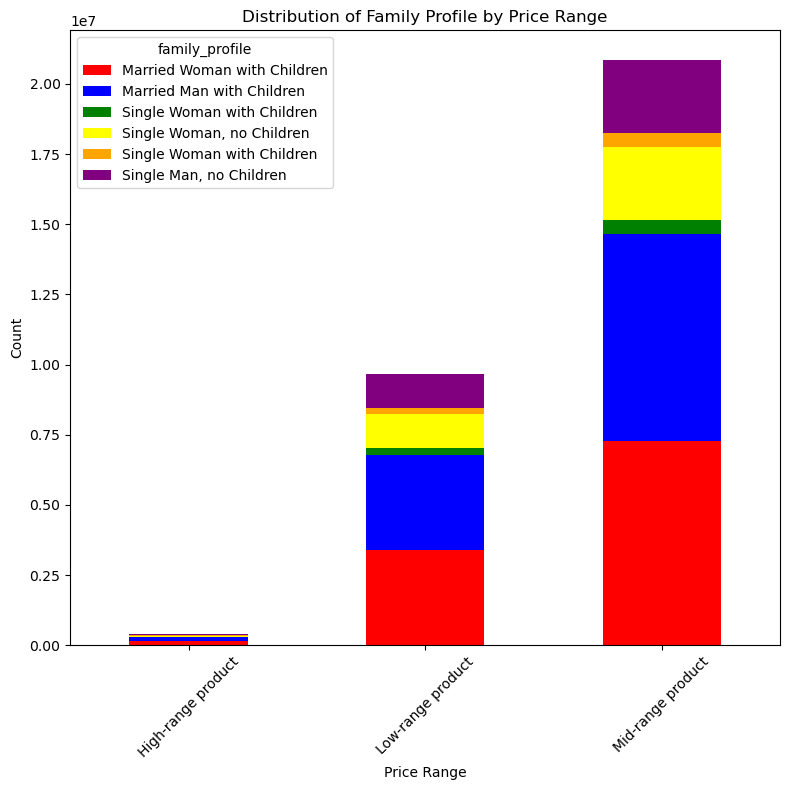

In [469]:
plt.show()

#### Departments Frequency

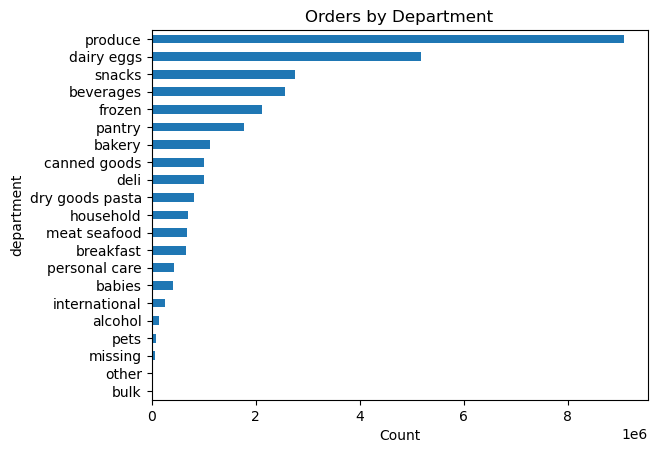

In [512]:
# Create bar chart for orders by department
department_frequency = df_final['department'].value_counts().sort_values(ascending = True).plot.barh()
plt.title("Orders by Department")
plt.xlabel('Count')
plt.ylabel('department')

plt.show()

In [473]:
# Export department_frequency_bar chart
department_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_frequency_bar.png'))

#### Brand Loyalty

In [514]:
# Create bar chart for loyalty flag
loyalty_bar = df_final['loyalty_flag'].value_counts().sort_values(ascending = True).plot.barh()
plt.title("Loyalty")
plt.xlabel('Count')
plt.ylabel('loyalty_flag')



Text(0, 0.5, 'loyalty_flag')

In [515]:
plt.figure(figsize=(8, 8))  # Set figure size
df_final['loyalty_flag'].value_counts().plot.pie(
    autopct='%1.1f%%',  # Show percentage on the chart
    startangle=90,  # Rotate to start from the top
    cmap='Set3',  # Color map for variety
    wedgeprops={'edgecolor': 'black'}  # Add black edges for clarity
)

# Titles
plt.title('Distribution of Customer Loyalty')

# Show the chart
plt.ylabel('')  # Remove y-label for better display

Text(0, 0.5, '')

In [482]:
# Export brand_loyalty_bar chart
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_bar.png'))

In [485]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_loyalty_pie_chart.jpg'))

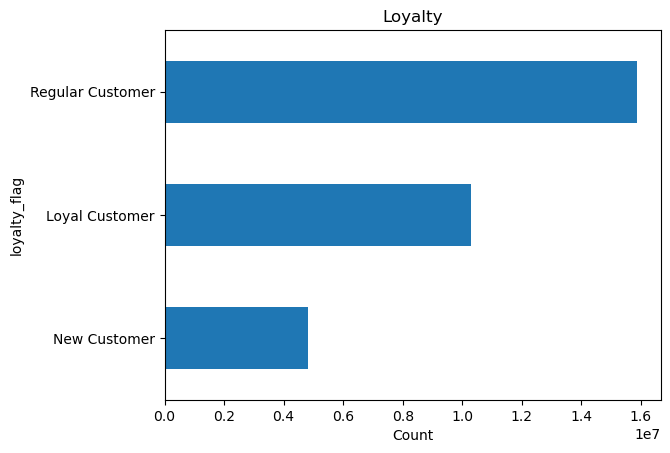

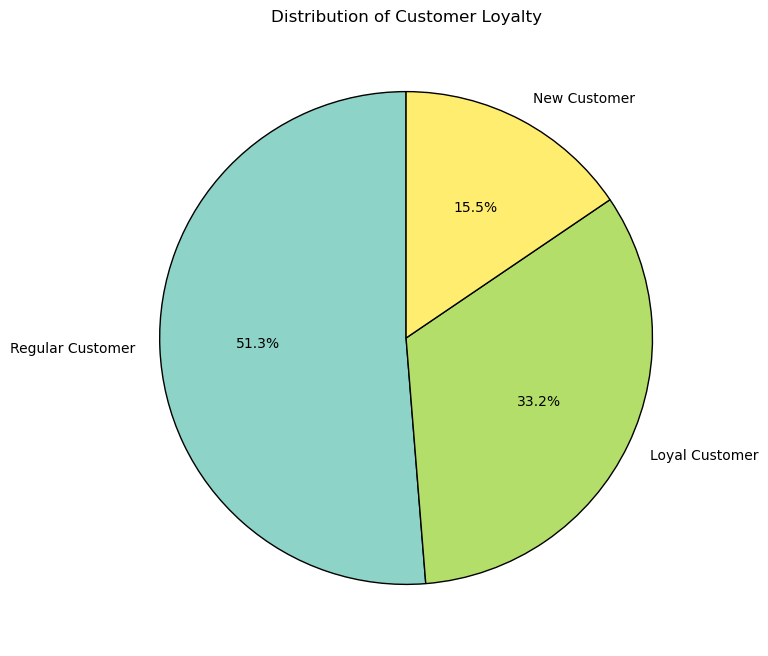

In [518]:
plt.show()

#### Are ordering habits based on customer’s loyalty status?

In [520]:
# Create a crosstab of department and loyalty flag
loyalty_flag_departments = pd.crosstab(df_final['department'],df_final['loyalty_flag'], dropna = False)

In [521]:
# Check columns
loyalty_flag_departments

loyalty_flag,Loyal Customer,New Customer,Regular Customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750056,2596419
deli,324046,158335,521453


In [522]:
# Create a crosstab of department and loyalty flag
loyalty_flag_departments = pd.crosstab(df_final['department'], df_final['loyalty_flag'], dropna=False)



In [523]:
# Create a stacked bar chart
loyalty_flag_departments.plot(kind = 'bar', stacked = True, figsize = (14, 8), colormap = 'inferno')

# Title and labels
plt.title('Ordering Habits by Loyalty Status')
plt.xlabel('Department')
plt.ylabel('Count')



Text(0, 0.5, 'Count')

In [628]:
# Export loyalty_flag_departments bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag_departments_bar.jpg'))

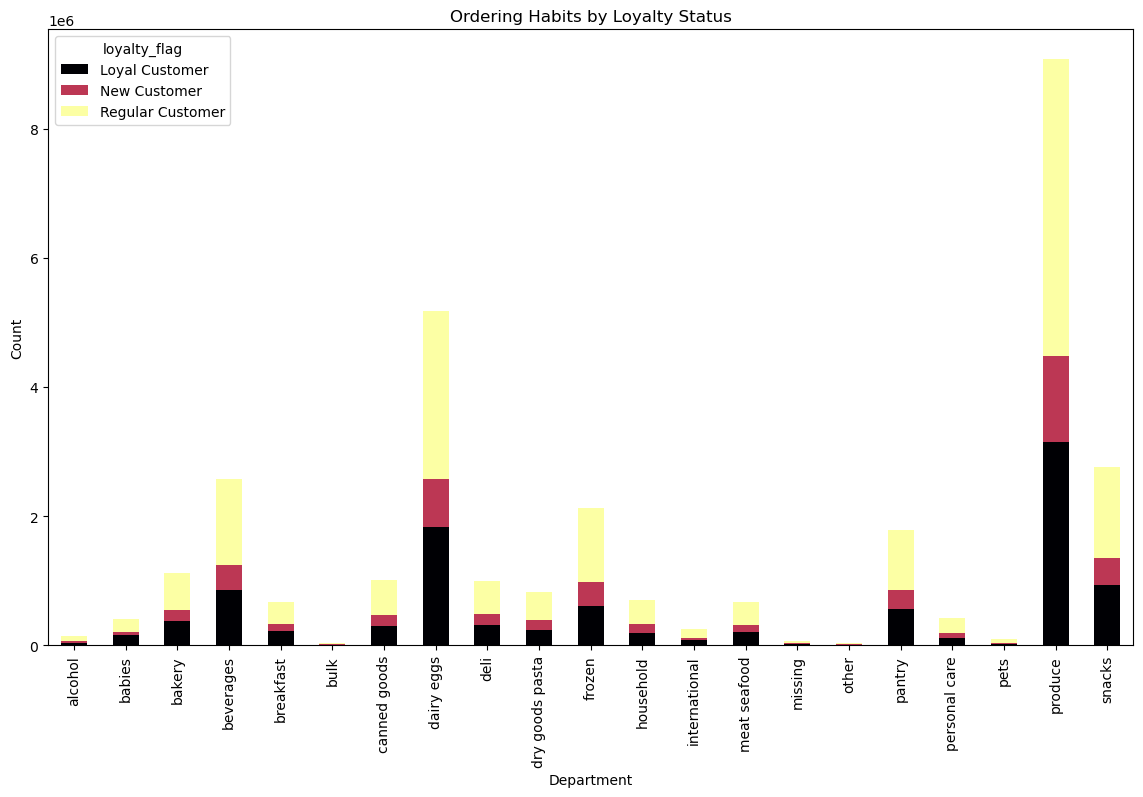

In [524]:
plt.show()

#### Ordering Habits Based On a Customer’s Region

In [531]:
# Create a crosstab of region and loyalty_flag
loyalty_flag_region = pd.crosstab(df_final['region'],df_final['loyalty_flag'], dropna = False)

In [532]:
# Check columns
loyalty_flag_region

loyalty_flag,Loyal Customer,New Customer,Regular Customer
region,,,
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744
South,3405844,1593664,5311631
West,2662690,1231114,4033423


In [533]:
# Create a crosstab of region and loyalty_flag
loyalty_flag_region = pd.crosstab(df_final['region'], df_final['loyalty_flag'], dropna = False)



# Create a stacked bar chart
loyalty_flag_region.plot(kind = 'bar', stacked = True, figsize = (14, 8), colormap = 'inferno')

# Title and labels
plt.title('Ordering Habits by Region and Loyalty Status')
plt.xlabel('Region')
plt.ylabel('Count')



Text(0, 0.5, 'Count')

In [649]:
# Export loyalty_flag_region bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag_region_bar.png'))

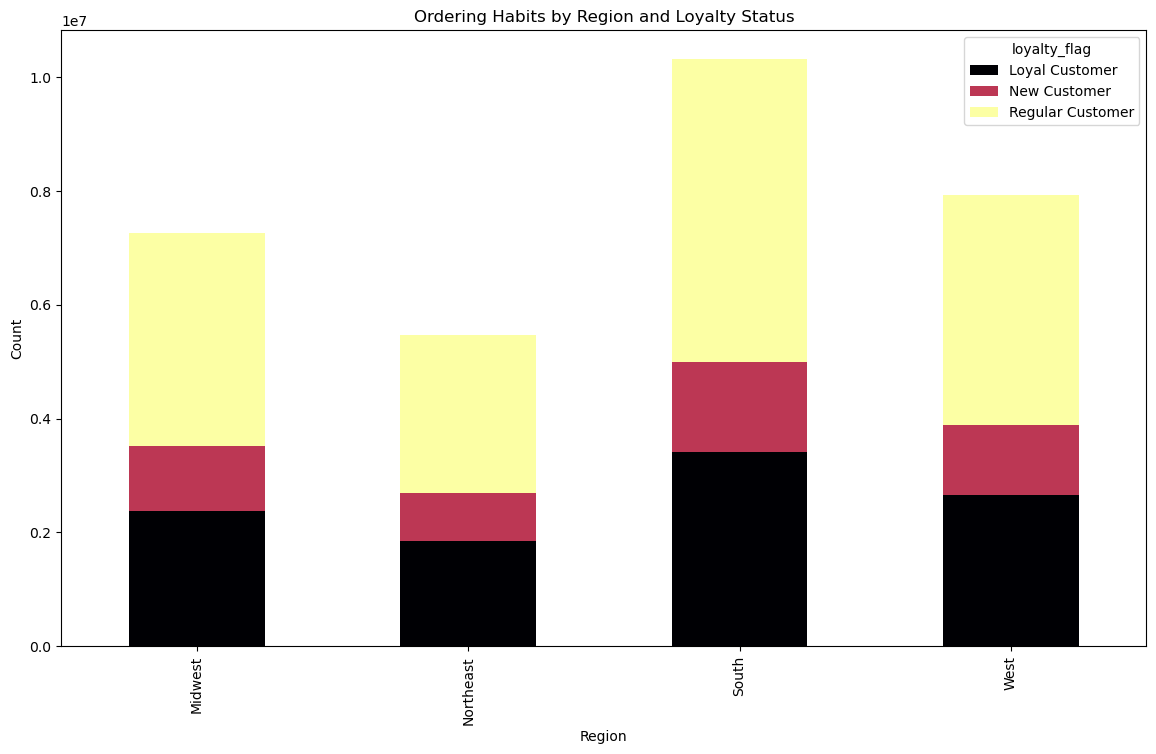

In [536]:
plt.show()

#### Is there a connection between age and family status in terms of ordering habits?

In [540]:
# create crosstab of age groupand family profile
age_family_profile = pd.crosstab(df_final['age_group'],df_final['family_profile'], dropna = False)

In [541]:
# Check columns
age_family_profile

family_profile,Married Man with Children,Married Woman with Children,Single Man with Children,"Single Man, no Children",Single Woman with Children,"Single Woman, no Children"
age_group,,,,,,
18-29 years old,1487826,1400987,757596,740777,723576,706841
30-49 years old,3663561,3640434,0,1217847,0,1208844
50-59 years old,1798717,1822953,0,614632,0,605469
60-81 years old,3997642,3931591,0,1308142,0,1337129


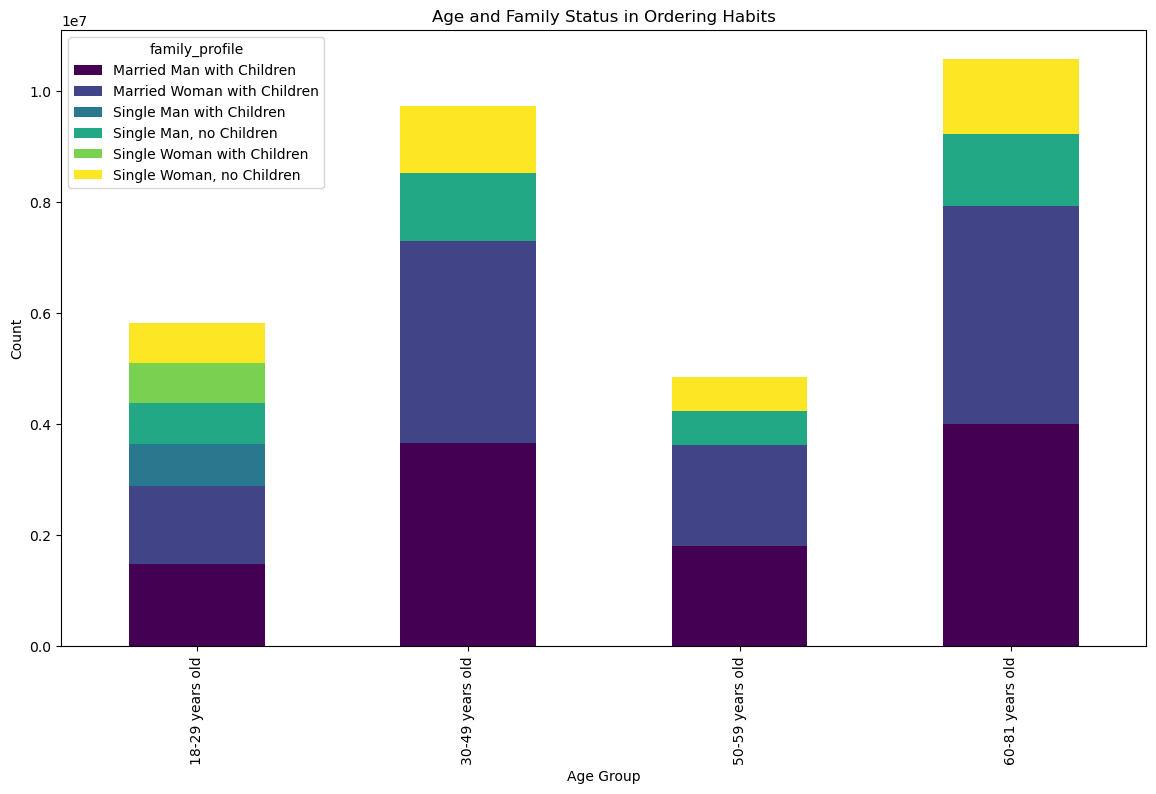

In [542]:
# Create a crosstab of age_group and family_profile
age_family_crosstab = pd.crosstab(df_final['age_group'], df_final['family_profile'], dropna = False)


age_family_crosstab.plot(kind = 'bar', stacked = True, figsize = (14, 8), colormap = 'viridis')

# Title and labels
plt.title('Age and Family Status in Ordering Habits')
plt.xlabel('Age Group')
plt.ylabel('Count')



In [201]:
# Export age_family_status bar chart 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_family_status_bar.png'))

In [546]:
plt.show()

#### Is a connection between age and income earned?

In [549]:
# Create a scatterplot of age and income
age_income_scatterplot = sns.scatterplot(x = 'Age', y = 'Income',data = df_final)

The scatterplot shows that even though the majority seem to earn within 200,000, there is a jump in the income of individuals aged above 40. There are more people aged 40+ that earn above 200,000 with some individuals able to earn an income above 400,000. No one below 40 managed to earn above 400,000. As such we can determine that there is a slightly positive correlation between age and income.

In [205]:
# Export scatterplot
age_income_scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income_scatterplot.png'))

#### Marital status of customers

In [556]:
# Create marital status bar chart
family_status_bar = df_final['Family Status'].value_counts().plot.bar()

In [557]:
plt.figure(figsize=(8, 8))  # Set figure size
df_final['Family Status'].value_counts().plot.pie(
    autopct='%1.1f%%',  # Show percentage on the chart
    startangle=90,  # Rotate to start from the top
    cmap='Set3',  # Color map for variety
    wedgeprops={'edgecolor': 'black'}  # Add black edges for clarity
)

# Titles
plt.title('Distribution of Marital Status')

# Show the chart
plt.ylabel('')  # Remove y-label for better display
plt.tight_layout() 

In [672]:
# Export marital_status bar chart to visualizations folder
family_status_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'marital_status_bar.png'))

In [675]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'marital_status_pie_chart.jpg'))

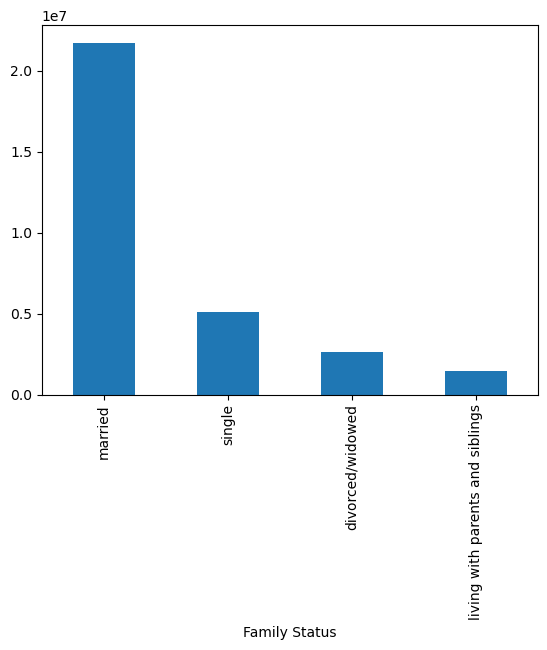

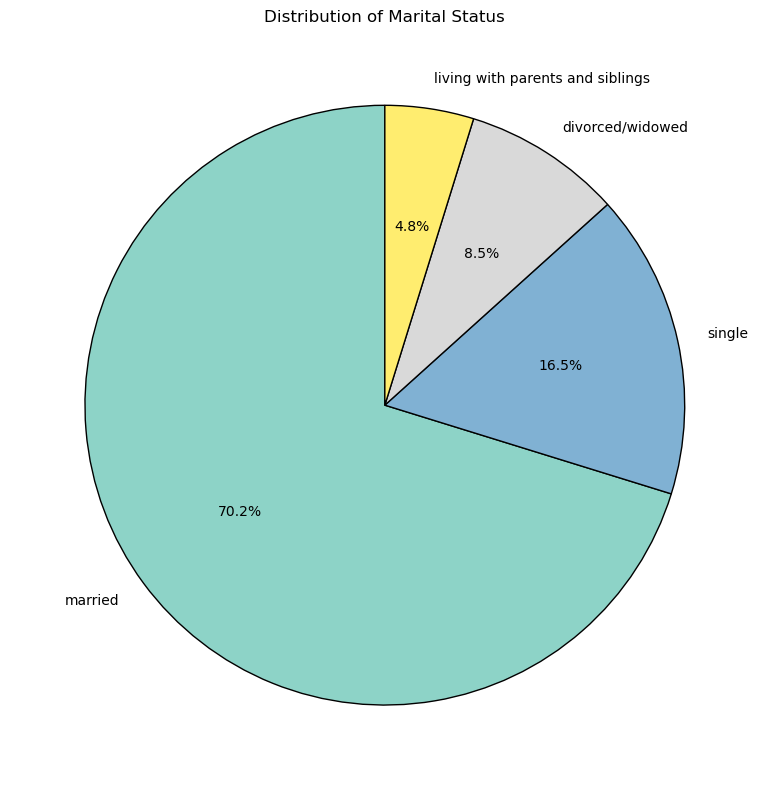

In [559]:
plt.show()

In [562]:
# Export final dataset
df_final.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_visuals.pkl'))